# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Label.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

####**Note: Please use GPU runtime to execute the code efficiently**

## Importing necessary libraries

In [ ]:
import os
import numpy as np                                                                               # Importing numpy for Matrix Operations
import pandas as pd                                                                              # Importing pandas to read CSV files
import matplotlib.pyplot as plt                                                                  # Importting matplotlib for Plotting and visualizing images
import math                                                                                      # Importing math module to perform mathematical operations
import cv2                                                                                       # Importing openCV for image processing
import seaborn as sns                                                                            # Importing seaborn to plot graphs


# Tensorflow modules
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator                              # Importing the ImageDataGenerator for data augmentation
from tensorflow.keras.models import Sequential                                                   # Importing the sequential module to define a sequential model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,BatchNormalization # Defining all the layers to build our CNN Model
from tensorflow.keras.optimizers import Adam,SGD                                                 # Importing the optimizers which can be used in our model
from sklearn import preprocessing                                                                # Importing the preprocessing module to preprocess the data
from sklearn.model_selection import train_test_split                                             # Importing train_test_split function to split the data into train and test
from sklearn.metrics import confusion_matrix                                                     # Importing confusion_matrix to plot the confusion matrix

# Display images using OpenCV
from google.colab.patches import cv2_imshow                                                      # Importing cv2_imshow from google.patches to display images
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import backend

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [ ]:
# Mount Google drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the image file of the dataset
images = np.load('/content/drive/MyDrive/01 Texas AI Program/Temporal/images.npy')

# Load the labels file of the dataset
labels = pd.read_csv('/content/drive/MyDrive/01 Texas AI Program/Temporal/Labels.csv')

## Data Overview

### Understand the shape of the dataset

In [ ]:
print(images.shape)
print(labels.shape)

(4750, 128, 128, 3)
(4750, 1)


There are 4750 RGB  images of shape 128 x 128 X 3, each image having 3 channels.

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

In [ ]:
def plot_images(images,labels):
  num_classes=12                                                                  # Number of Classes
  categories=np.unique(labels)
  keys=dict(labels['Label'])                                                      # Obtaing the unique classes from y_train
  rows = 3                                                                        # Defining number of rows=3
  cols = 4                                                                        # Defining number of columns=4
  fig = plt.figure(figsize=(10, 8))                                               # Defining the figure size to 10x8
  for i in range(cols):
      for j in range(rows):
          random_index = np.random.randint(0, len(labels))                        # Generating random indices from the data and plotting the images
          ax = fig.add_subplot(rows, cols, i * rows + j + 1)                      # Adding subplots with 3 rows and 4 columns
          ax.imshow(images[random_index, :])                                      # Plotting the image
          ax.set_title(keys[random_index])
  plt.show()

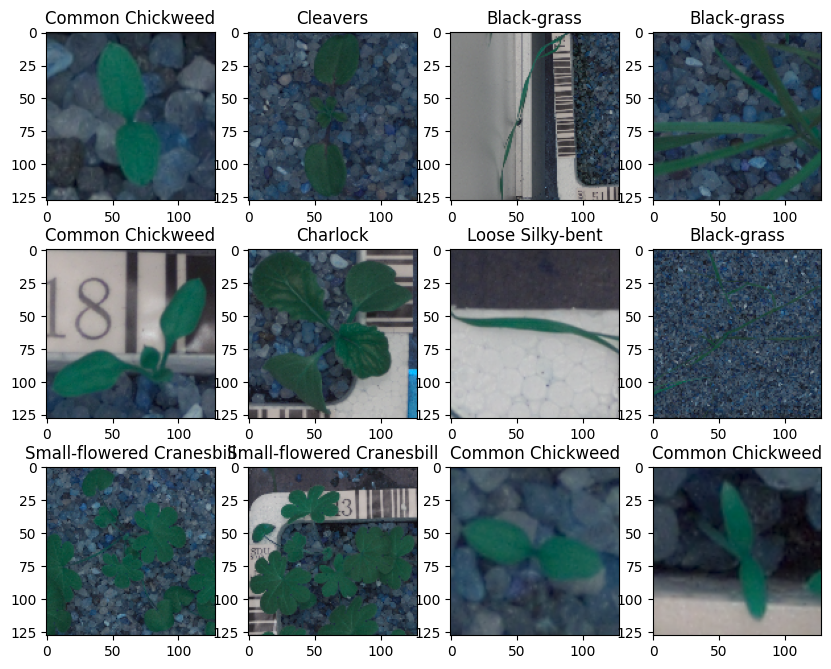

In [ ]:
plot_images(images,labels)

<b> Checking for data imbalance

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Small-flowered Cranesbill'),
  Text(1, 0, 'Fat Hen'),
  Text(2, 0, 'Shepherds Purse'),
  Text(3, 0, 'Common wheat'),
  Text(4, 0, 'Common Chickweed'),
  Text(5, 0, 'Charlock'),
  Text(6, 0, 'Cleavers'),
  Text(7, 0, 'Scentless Mayweed'),
  Text(8, 0, 'Sugar beet'),
  Text(9, 0, 'Maize'),
  Text(10, 0, 'Black-grass'),
  Text(11, 0, 'Loose Silky-bent')])

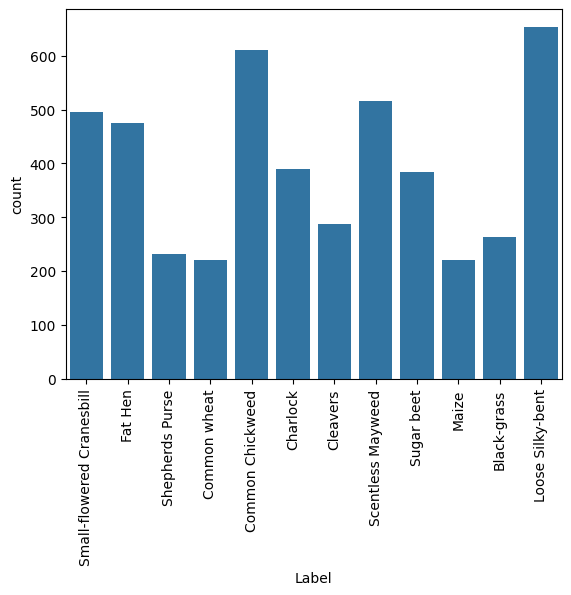

In [ ]:
sns.countplot(data=labels, x='Label')
plt.xticks(rotation='vertical')

- From the above plot, the dataset is imbalanced.
- There are between 200 and 300 images for each of the following categories: Shepherds Purse, Common wheat, Maize, Black-grass and Cleavers
- There are between 300 and 400 images for each of the following categories: Charlock and Sugar beet
- There are between 400 and 500 images for each of the following categories: Small-flowered Cranebill and Fat Hen
- There are more than 500 images for each of the following categories: Common Chickweed, Scentless Mayweed and Loose Silky-bent

## Data Pre-Processing

### Convert the BGR images to RGB images.

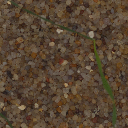

In [ ]:
cv2_imshow(images[4000])

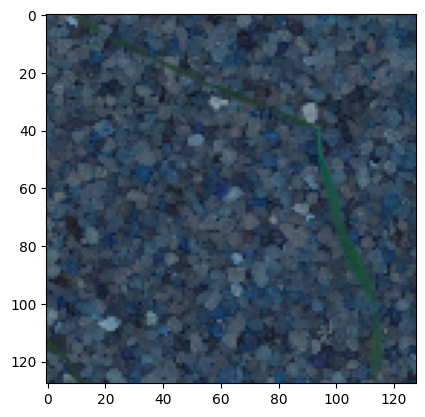

In [ ]:
plt.imshow(images[4000])

- We can observe that the images are being shown in different colors when plotted with openCV and matplotlib as OpenCV reads images in BGR format and this shows that the given numpy arrays were generated from the original images using OpenCV.
- Now we will convert these BGR images to RGB images so we could interpret them easily.

In [ ]:
# Converting the images from BGR to RGB using cvtColor function of OpenCV
for i in range(len(images)):
  images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [ ]:
images_decreased=[]
height = 64
width = 64
dimensions = (width, height)
for i in range(len(images)):
  images_decreased.append( cv2.resize(images[i], dimensions, interpolation=cv2.INTER_LINEAR))

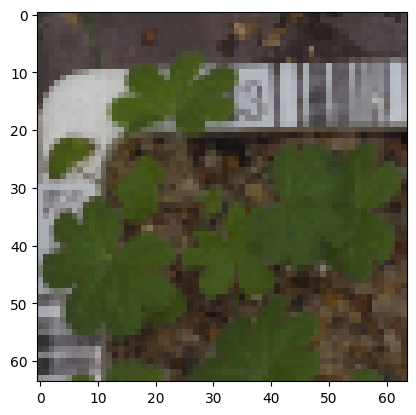

In [ ]:
plt.imshow(images_decreased[3])

## Visualizing images using Gaussian Blur

In [ ]:
# Applying Gaussian Blur to denoise the images
images_gb=[]
for i in range(len(images)):
  # gb[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
  images_gb.append(cv2.GaussianBlur(images[i], ksize =(3,3),sigmaX =  0))


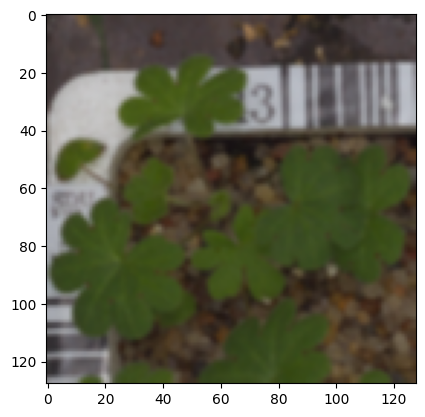

In [ ]:
plt.imshow(images_gb[3])

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

- we will only use 15% of our data for testing, 15% of our data for validation and 70% of our data for training.
- We are using the train_test_split() function from scikit-learn. Here, we split the dataset into three parts, train,test and validation.

In [ ]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(np.array(images_decreased),labels , test_size=0.15, random_state=42,stratify=labels)
X_train, X_val, y_train, y_val = train_test_split(X_temp,y_temp , test_size=0.15, random_state=42,stratify=y_temp)

In [ ]:
print(X_train.shape,y_train.shape)
print(X_val.shape,y_val.shape)
print(X_test.shape,y_test.shape)

(3431, 64, 64, 3) (3431, 1)
(606, 64, 64, 3) (606, 1)
(713, 64, 64, 3) (713, 1)


### Encode the target labels

In [ ]:
# Convert labels from names to one hot vectors.
# We have already used encoding methods like onehotencoder and labelencoder earlier so now we will be using a new encoding method called labelBinarizer.
# Labelbinarizer works similar to onehotencoder

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train_encoded = enc.fit_transform(y_train)
y_val_encoded=enc.transform(y_val)
y_test_encoded=enc.transform(y_test)

### Data Normalization

Since the **image pixel values range from 0-255**, our method of normalization here will be **scaling** - we shall **divide all the pixel values by 255 to standardize the images to have values between 0-1.**

In [ ]:
# Normalizing the image pixels
X_train_normalized = X_train.astype('float32')/255.0
X_val_normalized = X_val.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

## Model Building

### Model: 1

First, we need to clear the previous model's history from the session even if a single model can run multiple times on the same data.

In Keras, we need a special command to clear the model's history, otherwise the previous model history remains in the backend.

Also, let's fix the seed again after clearing the backend.

Let's **set the seed for random number generators in Numpy, the Random library in Python, and in TensorFlow** to be able to reproduce the same results every time we run the code.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

Now, let's build a **CNN Model** with the following 2 main parts - <br>

1. **The Feature Extraction layers** which are comprised of convolutional and pooling layers.
2. **The Fully Connected classification layers** for prediction.<br><br>

In [ ]:
# Intializing a sequential model
model_1 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of images
model_1.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model_1.add(MaxPooling2D((2, 2), padding = 'same'))

model_1.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_1.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_1.add(Flatten())

# Fully connected: Adding 3 hidden layers with 64, 32 and 32 neurons and droput 0.25 for the first two
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.25))
# Adding a fully connected dense layer with 64 neurons
model_1.add(Dense(32, activation='relu'))
model_1.add(Dropout(0.25))
model_1.add(Dense(32, activation='relu'))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_1.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt=Adam()
# Compile model
model_1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 64)                5

### <b> Fitting the model on the train data

In [ ]:
history_1 = model_1.fit(
            X_train_normalized, y_train_encoded,
            epochs=100,
            validation_data=(X_val_normalized,y_val_encoded),
            batch_size=32,
            verbose=2
)

Epoch 1/100
108/108 - 5s - loss: 2.4564 - accuracy: 0.1265 - val_loss: 2.4265 - val_accuracy: 0.1601 - 5s/epoch - 43ms/step
Epoch 2/100
108/108 - 1s - loss: 2.3436 - accuracy: 0.1956 - val_loss: 2.1011 - val_accuracy: 0.2640 - 502ms/epoch - 5ms/step
Epoch 3/100
108/108 - 1s - loss: 2.0629 - accuracy: 0.2649 - val_loss: 1.9276 - val_accuracy: 0.3185 - 509ms/epoch - 5ms/step
Epoch 4/100
108/108 - 1s - loss: 1.9426 - accuracy: 0.3057 - val_loss: 1.8156 - val_accuracy: 0.3828 - 502ms/epoch - 5ms/step
Epoch 5/100
108/108 - 1s - loss: 1.8450 - accuracy: 0.3404 - val_loss: 1.7138 - val_accuracy: 0.4340 - 507ms/epoch - 5ms/step
Epoch 6/100
108/108 - 1s - loss: 1.7481 - accuracy: 0.3737 - val_loss: 1.6697 - val_accuracy: 0.4488 - 503ms/epoch - 5ms/step
Epoch 7/100
108/108 - 1s - loss: 1.7231 - accuracy: 0.3841 - val_loss: 1.6013 - val_accuracy: 0.4653 - 519ms/epoch - 5ms/step
Epoch 8/100
108/108 - 1s - loss: 1.6381 - accuracy: 0.4069 - val_loss: 1.4898 - val_accuracy: 0.5330 - 516ms/epoch - 5ms

### **Model Evaluation**

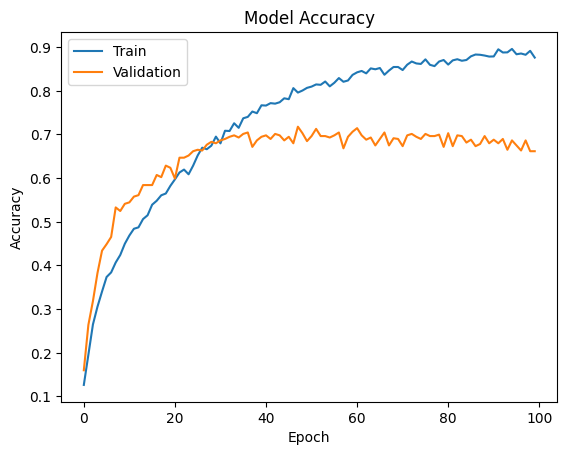

In [ ]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Evaluating the model on test data**

In [ ]:
accuracy = model_1.evaluate(X_test_normalized, y_test_encoded, verbose=2)

23/23 - 0s - loss: 1.8521 - accuracy: 0.6620 - 117ms/epoch - 5ms/step


**Observations:**

* Our model has 548,140 trainable parameters.
* After running 100 epochs, **we were able to achieve a training accuracy of ~88% and a testing accuracy of ~66%.
* The model seems to overfit on the data
- The model is performing somewhat poorly due to only ~66% of accuracy.

### **Generating the predictions using test data**

In [ ]:
# Here we would get the output as probablities for each category
y_pred_model_1=model_1.predict(X_test_normalized)

23/23 [==============================] - 0s 2ms/step


In [ ]:
y_pred_model_1

array([[2.5921213e-04, 3.2898085e-17, 1.2665861e-21, ..., 1.5685745e-33,
        1.9539085e-20, 6.4405317e-28],
       [1.4128367e-03, 4.2961056e-12, 1.1145036e-11, ..., 1.0178533e-18,
        1.3253896e-12, 4.6856947e-16],
       [4.1058251e-12, 4.3897174e-04, 1.1434498e-09, ..., 9.0558699e-04,
        1.6005059e-08, 5.4548298e-05],
       ...,
       [3.1454121e-05, 2.6719090e-18, 5.7154225e-20, ..., 5.0085532e-24,
        1.9748244e-16, 3.8601126e-21],
       [5.7247636e-30, 2.4423991e-12, 1.8767873e-33, ..., 4.1501873e-04,
        9.5199957e-14, 1.2009749e-21],
       [4.0883815e-06, 3.4980854e-08, 1.7306005e-05, ..., 1.4651084e-07,
        2.9218427e-06, 3.1426177e-06]], dtype=float32)

### **Plotting the Confusion Matrix**

*   The Confusion matrix is also defined as an inbuilt function in the TensorFlow module, so we can use that for evaluating the classification model.
*   The Confusion matrix expects categorical data as input. However, y_test_encoded is an encoded value, whereas y_pred has probabilities. So,we must retrieve the categorical values from the encoded values.
*   We will use the `argmax()` function to obtain the maximum value over each category on both y_test_encoded and y_pred and obtain their respective classes.

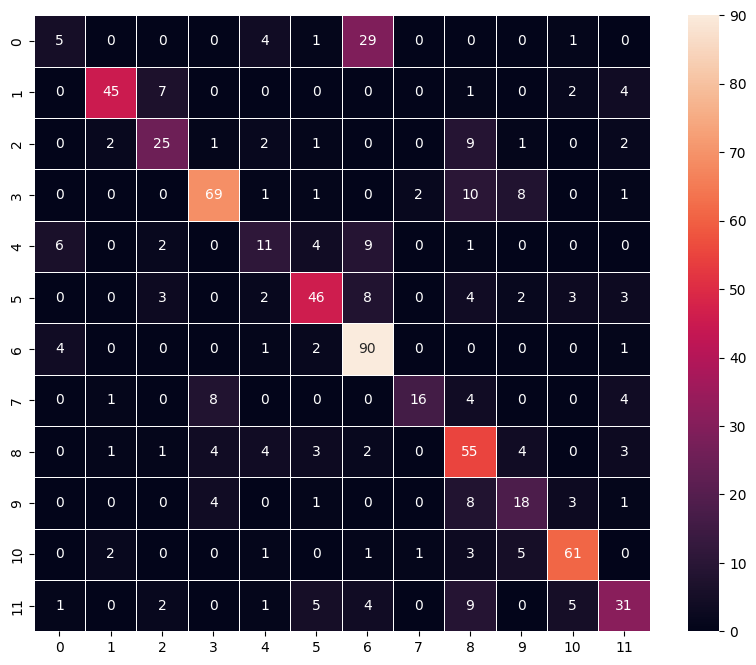

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg_model_1=np.argmax(y_pred_model_1,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg_model_1)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

<b> Observations</b><br>
- We observe that some of the classes are not predicted correctly.
- Class 0 is the worst class since most of the plants of this class are being predicted as class 6.
- Class 6 is the best predicted.
- The other classes are performing relatively well.

### Model: 2

## Model Performance Improvement

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

In [ ]:
# Code to monitor val_accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In most of the real-world case studies, it is challenging to acquire a large number of images and then train CNNs. To overcome this problem, one approach we might consider is Data Augmentation. CNNs have the property of translational invariance, which means they can recognise an object even if its appearance shifts translationally in some way.
Taking this attribute into account, we can augment the images using the techniques listed below -
1. Horizontal Flip (should be set to True/False)
2. Vertical Flip (should be set to True/False)
3. Height Shift (should be between 0 and 1)
4. Width Shift (should be between 0 and 1)
5. Rotation (should be between 0 and 180)
6. Shear (should be between 0 and 1)
7. Zoom (should be between 0 and 1) etc.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
#Data augmentation parameters, the train datagen will be called in the model fitting for model 2 and 3
train_datagen = ImageDataGenerator(
                              horizontal_flip = True,
                              vertical_flip = False,
                              height_shift_range= 0.1,
                              width_shift_range=0.1,
                              rotation_range=20,
                              fill_mode='nearest'
                              )

In [ ]:
# Intializing a sequential model
model_2 = Sequential()

# Adding first conv layer with 64 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension images
model_2.add(Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(64, 64, 3)))

# Adding max pooling to reduce the size of output of first conv layer
model_2.add(MaxPooling2D((2, 2), padding = 'same'))
# model.add(BatchNormalization())
model_2.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model_2.add(MaxPooling2D((2, 2), padding = 'same'))
model_2.add(BatchNormalization())
# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
model_2.add(Flatten())

# Fully connected: Adding 3 hidden layers with 64, 32 and 32 neurons and droput 0.25 for the first two
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.25))
# Adding a fully connected dense layer with 64 neurons
model_2.add(Dense(32, activation='relu'))
model_2.add(Dropout(0.25))
model_2.add(Dense(32, activation='relu'))
# Adding the output layer with 12 neurons and activation functions as softmax since this is a multi-class classification problem
model_2.add(Dense(12, activation='softmax'))

# Using Adam Optimizer
opt=Adam()
# Compile model
model_2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                        

### <b> Fitting the model on the train data

In [ ]:
# Epochs
epochs = 100
# Batch size
batch_size = 64
# Fitting the model with data augmentation
history_2 = model_2.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/100
53/53 [==============================] - 6s 73ms/step - loss: 2.2839 - accuracy: 0.2174 - val_loss: 2.4179 - val_accuracy: 0.1568
Epoch 2/100
53/53 [==============================] - 4s 70ms/step - loss: 1.8295 - accuracy: 0.3679 - val_loss: 2.2757 - val_accuracy: 0.2607
Epoch 3/100
53/53 [==============================] - 4s 70ms/step - loss: 1.6289 - accuracy: 0.4330 - val_loss: 2.2991 - val_accuracy: 0.2277
Epoch 4/100
53/53 [==============================] - 4s 69ms/step - loss: 1.4838 - accuracy: 0.4933 - val_loss: 2.1899 - val_accuracy: 0.3152
Epoch 5/100
53/53 [==============================] - 4s 70ms/step - loss: 1.4415 - accuracy: 0.5025 - val_loss: 1.9064 - val_accuracy: 0.5248
Epoch 6/100
53/53 [==============================] - 4s 70ms/step - loss: 1.3732 - accuracy: 0.5227 - val_loss: 2.0308 - val_accuracy: 0.3993
Epoch 7/100
53/53 [==============================] - 4s 69ms/step - loss: 1.3363 - accuracy: 0.5391 - val_loss: 1.8696 - val_accuracy: 0.3350
Epoch 

### **Model Evaluation**

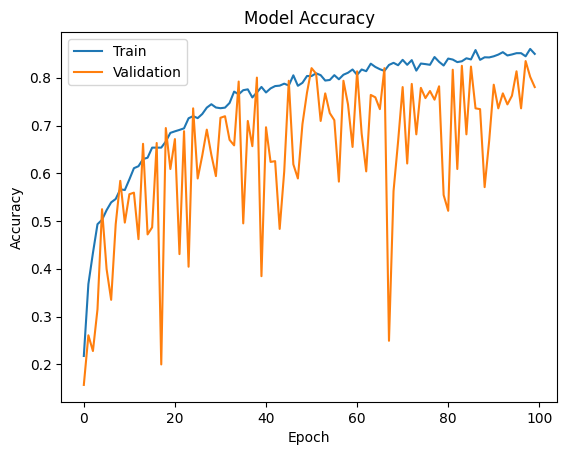

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Evaluating the model on test data**

In [ ]:
accuracy = model_2.evaluate(X_test_normalized, y_test_encoded, verbose=2)

23/23 - 0s - loss: 0.6332 - accuracy: 0.7966 - 78ms/epoch - 3ms/step


**Observations:**

* Our model has 548,268 trainable parameters.
* After running 100 epochs, **we were able to achieve a training accuracy of ~85% and a testing accuracy of ~80%.
- The model is performing weel but with noise in the model.

### **Generating the predictions using test data**

In [ ]:
# Here we would get the output as probablities for each category
y_pred_model_2=model_2.predict(X_test_normalized)

23/23 [==============================] - 0s 2ms/step


### **Plotting the Confusion Matrix**

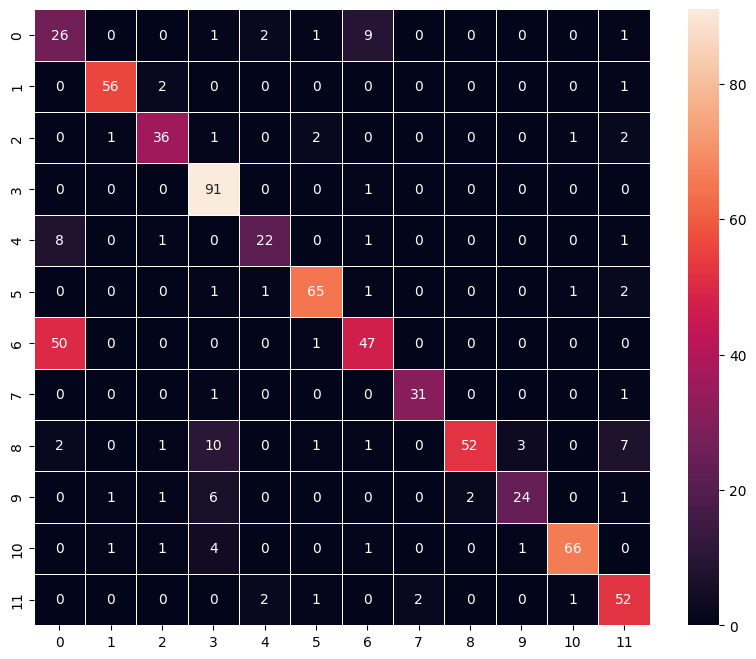

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg_model_2=np.argmax(y_pred_model_2,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg_model_2)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

**Observation:**
- The confusion matrix appears to be improving as well, however there is still some confusion between classes 0 and 6.
- For this model the 6 class is the most confused class among all.
- We can observe that this model has outperformed our previous model.

### Model: 3


# Transfer Learning using VGG16

- Let's try again, but this time, we will be using the idea of **Transfer Learning**. We will be loading a pre-built architecture - **VGG16**, which was trained on the ImageNet dataset and is the runner-up in the ImageNet competition in 2014.

- For training VGG16, we will directly use the convolutional and pooling layers and freeze their weights i.e. no training will be done on them. For classification, we will replace the existing fully-connected layers with FC layers created specifically for our problem.


In [ ]:
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16

vgg_model = VGG16(weights='imagenet', include_top = False, input_shape = (64,64,3))
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [ ]:
# Making all the layers of the VGG model non-trainable. i.e. freezing them
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model_3 = Sequential()

# Adding the convolutional part of the VGG16 model from above
model_3.add(vgg_model)

# Flattening the output of the VGG16 model because it is from a convolutional layer
model_3.add(Flatten())

# Adding a dense output layer
model_3.add(Dense(64, activation='relu'))
model_3.add(Dropout(0.25))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dropout(0.25))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(12, activation='softmax'))
opt=Adam()
# Compile model
model_3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

# Generating the summary of the model
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                1

### <b> Fitting the model on the train data

In [ ]:
# Epochs
epochs = 50
# Batch size
batch_size = 64
# Fitting the model VGG with data augmentation
history_vgg16 = model_3.fit(train_datagen.flow(X_train_normalized,y_train_encoded,
                                       batch_size=batch_size,
                                       seed=42,
                                       shuffle=False),
                    epochs=epochs,
                    steps_per_epoch=X_train_normalized.shape[0] // batch_size,
                    validation_data=(X_val_normalized,y_val_encoded),
                    verbose=1)

Epoch 1/50
53/53 [==============================] - 7s 90ms/step - loss: 2.3583 - accuracy: 0.1645 - val_loss: 2.1358 - val_accuracy: 0.2624
Epoch 2/50
53/53 [==============================] - 4s 73ms/step - loss: 2.0641 - accuracy: 0.2712 - val_loss: 1.9030 - val_accuracy: 0.3284
Epoch 3/50
53/53 [==============================] - 4s 71ms/step - loss: 1.9012 - accuracy: 0.3279 - val_loss: 1.7773 - val_accuracy: 0.3531
Epoch 4/50
53/53 [==============================] - 4s 71ms/step - loss: 1.7895 - accuracy: 0.3522 - val_loss: 1.6873 - val_accuracy: 0.3713
Epoch 5/50
53/53 [==============================] - 4s 72ms/step - loss: 1.7042 - accuracy: 0.3802 - val_loss: 1.6024 - val_accuracy: 0.4026
Epoch 6/50
53/53 [==============================] - 4s 72ms/step - loss: 1.6647 - accuracy: 0.3986 - val_loss: 1.5793 - val_accuracy: 0.4125
Epoch 7/50
53/53 [==============================] - 4s 72ms/step - loss: 1.6011 - accuracy: 0.4229 - val_loss: 1.4976 - val_accuracy: 0.4439
Epoch 8/50
53

### **Model Evaluation**

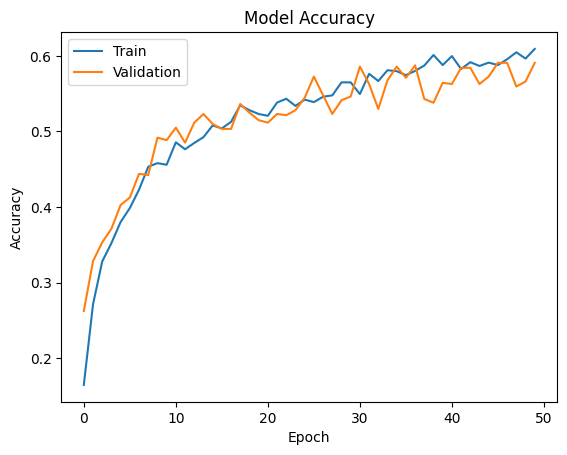

In [ ]:
plt.plot(history_vgg16.history['accuracy'])
plt.plot(history_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

### **Evaluating the model on test data**

In [ ]:
accuracy = model_3.evaluate(X_test_normalized, y_test_encoded, verbose=2)

23/23 - 0s - loss: 1.1529 - accuracy: 0.6157 - 378ms/epoch - 16ms/step



**Observations:**

* Our model has 14,849,356 parameters. The model has 134,668 trainable parameters. Non trainable parameters 14,714,688.
* After running 50 epochs, **we were able to achieve a training accuracy of ~60% and a testing accuracy of ~62%.
- The model is performing somewhat poorly due to only ~62% of accuracy but it is generalizing.

### **Generating the predictions using test data**

In [ ]:
# Here we would get the output as probablities for each category
y_pred_VGG=model_3.predict(X_test_normalized)

23/23 [==============================] - 0s 5ms/step


### **Plotting the Confusion Matrix**

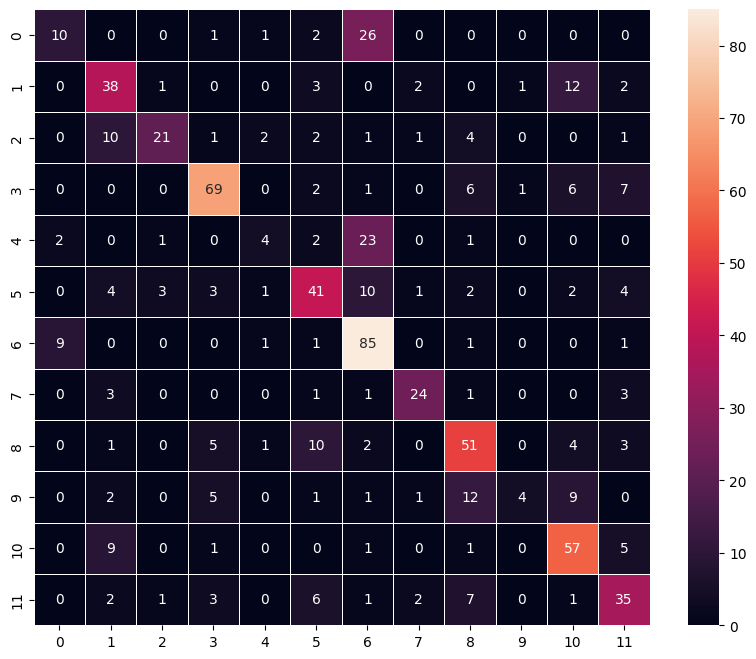

In [ ]:
# Obtaining the categorical values from y_test_encoded and y_pred
y_pred_arg_VGG=np.argmax(y_pred_VGG,axis=1)
y_test_arg=np.argmax(y_test_encoded,axis=1)

# Plotting the Confusion Matrix using confusion matrix() function which is also predefined tensorflow module
confusion_matrix = tf.math.confusion_matrix(y_test_arg,y_pred_arg_VGG)
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.4,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

- According to the confusion matrix and accuracy curve, the VGG16 model is performing similar to Model-1. The 0 class is the most confused together with 4 class.
- Thus we can say that Model-2 is our best model and we can use this model to predict and visualize some test images.

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

**CNN Model 1**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report((y_test_arg), y_pred_arg_model_1))

              precision    recall  f1-score   support

           0       0.31      0.12      0.18        40
           1       0.88      0.76      0.82        59
           2       0.62      0.58      0.60        43
           3       0.80      0.75      0.78        92
           4       0.41      0.33      0.37        33
           5       0.72      0.65      0.68        71
           6       0.63      0.92      0.75        98
           7       0.84      0.48      0.62        33
           8       0.53      0.71      0.61        77
           9       0.47      0.51      0.49        35
          10       0.81      0.82      0.82        74
          11       0.62      0.53      0.57        58

    accuracy                           0.66       713
   macro avg       0.64      0.60      0.61       713
weighted avg       0.66      0.66      0.65       713



**CNN Model 2**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report((y_test_arg), y_pred_arg_model_2))

              precision    recall  f1-score   support

           0       0.30      0.65      0.41        40
           1       0.95      0.95      0.95        59
           2       0.86      0.84      0.85        43
           3       0.79      0.99      0.88        92
           4       0.81      0.67      0.73        33
           5       0.92      0.92      0.92        71
           6       0.77      0.48      0.59        98
           7       0.94      0.94      0.94        33
           8       0.96      0.68      0.79        77
           9       0.86      0.69      0.76        35
          10       0.96      0.89      0.92        74
          11       0.76      0.90      0.83        58

    accuracy                           0.80       713
   macro avg       0.82      0.80      0.80       713
weighted avg       0.84      0.80      0.80       713



**CNN Model VGG**

In [ ]:
from sklearn.metrics import classification_report
print(classification_report((y_test_arg), y_pred_arg_VGG))

              precision    recall  f1-score   support

           0       0.48      0.25      0.33        40
           1       0.55      0.64      0.59        59
           2       0.78      0.49      0.60        43
           3       0.78      0.75      0.77        92
           4       0.40      0.12      0.19        33
           5       0.58      0.58      0.58        71
           6       0.56      0.87      0.68        98
           7       0.77      0.73      0.75        33
           8       0.59      0.66      0.63        77
           9       0.67      0.11      0.20        35
          10       0.63      0.77      0.69        74
          11       0.57      0.60      0.59        58

    accuracy                           0.62       713
   macro avg       0.61      0.55      0.55       713
weighted avg       0.62      0.62      0.59       713



In [1]:
pd.DataFrame({'Models':['Base CNN Model','CNN Model with Data Augmentation','Transfer Learning Model'],'Train Accuracy':['87%','85%','61%'],'Validation Accuracy':['66%','78%','59%'],'Test Accuracy':['66%','80%','62%']})

NameError: name 'pd' is not defined

**Observation**
- Model 2 is our best model

### Visualizing the prediction

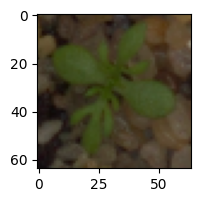

1/1 [==============================] - 0s 116ms/step
Predicted Label ['Scentless Mayweed']
True Label Scentless Mayweed


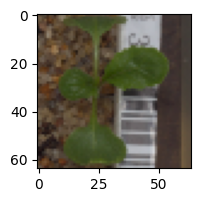

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Charlock']
True Label Charlock


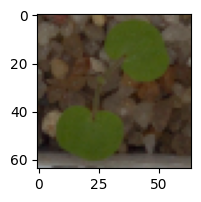

1/1 [==============================] - 0s 18ms/step
Predicted Label ['Small-flowered Cranesbill']
True Label Small-flowered Cranesbill


In [ ]:
# Visualizing the predicted and correct label of images from test data
plt.figure(figsize=(2,2))
plt.imshow(X_test[2])
plt.show()
print('Predicted Label', enc.inverse_transform(model_2.predict((X_test_normalized[2].reshape(1,64,64,3)))))   # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[2])                                               # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[33])
plt.show()
print('Predicted Label', enc.inverse_transform(model_2.predict((X_test_normalized[33].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[33])                                              # using inverse_transform() to get the output label from the output vector

plt.figure(figsize=(2,2))
plt.imshow(X_test[36])
plt.show()
print('Predicted Label', enc.inverse_transform(model_2.predict((X_test_normalized[36].reshape(1,64,64,3)))))  # reshaping the input image as we are only trying to predict using a single image
print('True Label', enc.inverse_transform(y_test_encoded)[36])                                              # using inverse_transform() to get the output label from the output vector

## Actionable Insights and Business Recommendations

- We can observe from the confusion matrix of all the models that our Model 2 with data augmentation was the best model because it predicted the majority of the classes better than the other models.
- The test accuracy of the model 2 model is 80%.
- Data Augmentation has also helped in improving the model.
- In this case employing the transfer learning model did not produce a better outcome than other CNNs.
- The classes 0 and 6 are being confused between each other. There is an opportunity to increase the model prediction if the model focus on these two categories.
- Model Deploymnet and Integration: The Client can deploy the model into a production so that can be used for real-tima predictions. Also the Client can integrate the model into client's existing systems or applications
- Monitoring and Maintenance: The Client can set up a monitoring system to keep track of the model's performance over tieme. Also, the Client can establish a maintenance schedule to retrain the model periodically with new data to ensure it stays accurate as the data distribution evolves.
- User Interface: The next step can be the develop of a user-friendly interface that allows users to interact with the model easily.
- Feedback: The Client can implement a feedback mechanism, that allows users to provide feedback on the model's predictions.
- Reporting: The CLient can generate regular reports to update stakeholders on the model's performance and any improvements achieved.

_____